In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)
matplotlib 2.2.2
numpy 1.19.2
pandas 0.23.0
sklearn 0.23.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

# 获取房价数据集
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# 数据集进行划分
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

# 归一化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

https://blog.csdn.net/u012969412/article/details/70882296

keras.layers.core.Dense (units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
                         bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
                         activity_regularizer=None, kernel_constraint=None, bias_constraint=None  )

units：大于0的整数，代表该层的输出维度

activation：激活函数，为预定义的激活函数名（参考激活函数），或逐元素（element-wise）的Theano函数。如果不指定该参数，将不会使用任何激活函数（即使用线性激活函数：a(x)=x）

use_bias: 布尔值，是否使用偏置项

kernel_initializer：权值初始化方法，为预定义初始化方法名的字符串，或用于初始化权重的初始化器。参考initializers

bias_initializer：权值初始化方法，为预定义初始化方法名的字符串，或用于初始化权重的初始化器。参考initializers

kernel_regularizer：施加在权重上的正则项，为Regularizer对象

bias_regularizer：施加在偏置向量上的正则项，为Regularizer对象

activity_regularizer：施加在输出上的正则项，为Regularizer对象

kernel_constraints：施加在权重上的约束项，为Constraints对象

bias_constraints：施加在偏置上的约束项，为Constraints对象

input_dim:可以指定输入数据的维度

In [7]:
# learning_rate: [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# W = W + grad * learning_rate


# 学习率集合
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []

for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                           input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(
        patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                        validation_data = (x_valid_scaled, y_valid),
                        epochs = 100,
                        callbacks = callbacks)
    histories.append(history)
      

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 80us/sample - loss: 6.2745 - val_loss: 5.2257
Epoch 2/100
11610/11610 [==============================] - 0s 36us/sample - loss: 4.1284 - val_loss: 3.5977
Epoch 3/100
11610/11610 [==============================] - 0s 36us/sample - loss: 2.9454 - val_loss: 2.6692
Epoch 4/100
11610/11610 [==============================] - 0s 36us/sample - loss: 2.2440 - val_loss: 2.1038
Epoch 5/100
11610/11610 [==============================] - 0s 36us/sample - loss: 1.8031 - val_loss: 1.7415
Epoch 6/100
11610/11610 [==============================] - 0s 34us/sample - loss: 1.5118 - val_loss: 1.4976
Epoch 7/100
11610/11610 [==============================] - 0s 33us/sample - loss: 1.3119 - val_loss: 1.3281
Epoch 8/100
11610/11610 [==============================] - 0s 35us/sample - loss: 1.1711 - val_loss: 1.2073
Epoch 9/100
11610/11610 [==============================] - 0s 35us/sample - loss: 1.069

Epoch 76/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5839 - val_loss: 0.6327
Epoch 77/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5820 - val_loss: 0.6306
Epoch 78/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5802 - val_loss: 0.6285
Epoch 79/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5783 - val_loss: 0.6265
Epoch 80/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5765 - val_loss: 0.6244
Epoch 81/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5747 - val_loss: 0.6224
Epoch 82/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5729 - val_loss: 0.6204
Epoch 83/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5712 - val_loss: 0.6184
Epoch 84/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5695 - val_loss: 0.6164
Epoch 85/100
11610/

11610/11610 [==============================] - 0s 33us/sample - loss: 0.5898 - val_loss: 0.6250
Epoch 8/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5740 - val_loss: 0.6080
Epoch 9/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5603 - val_loss: 0.5940
Epoch 10/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5478 - val_loss: 0.5802
Epoch 11/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5376 - val_loss: 0.5702
Epoch 12/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5280 - val_loss: 0.5641
Epoch 13/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5195 - val_loss: 0.5503
Epoch 14/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5121 - val_loss: 0.5434
Epoch 15/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5050 - val_loss: 0.5383
Epoch 16/100
11610/11610 [========

11610/11610 [==============================] - 0s 33us/sample - loss: 0.3689 - val_loss: 0.3831
Epoch 15/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3679 - val_loss: 0.3816
Epoch 16/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3654 - val_loss: 0.3785
Epoch 17/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3638 - val_loss: 0.3756
Epoch 18/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3625 - val_loss: 0.3766
Epoch 19/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3596 - val_loss: 0.3768
Epoch 20/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3576 - val_loss: 0.3747
Epoch 21/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3550 - val_loss: 0.3706
Epoch 22/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3539 - val_loss: 0.3667
Train on 11610 samples, validate

Learning rate:  0.0001


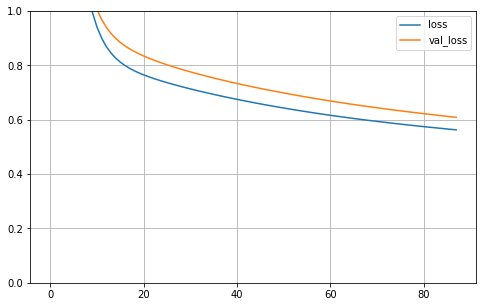

Learning rate:  0.0003


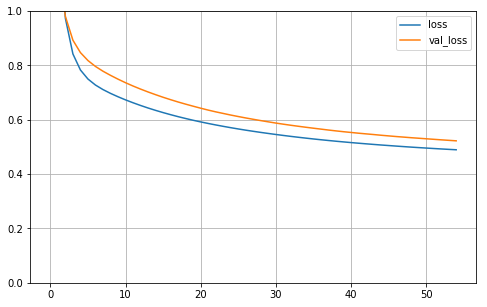

Learning rate:  0.001


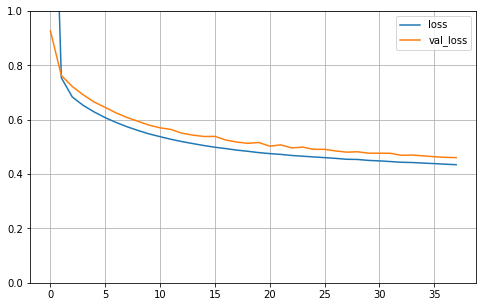

Learning rate:  0.003


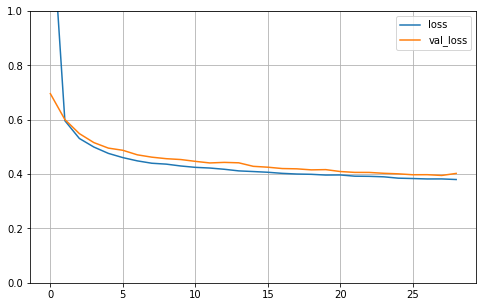

Learning rate:  0.01


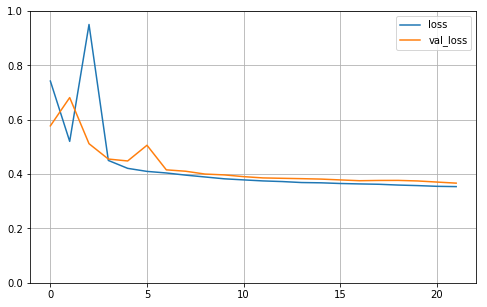

Learning rate:  0.03


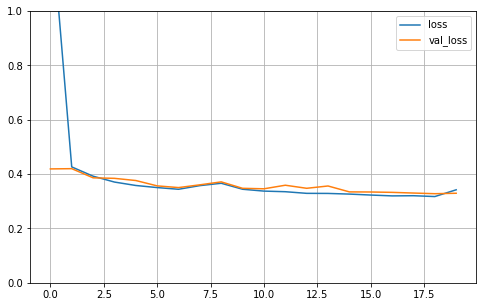

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
for lr, history in zip(learning_rates, histories):
    print("Learning rate: ", lr)
    plot_learning_curves(history)